In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType
from pyspark.sql.functions import col,stddev, variance
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/23 12:35:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Step 2

In [5]:
df1 = spark.read.csv('raw_vac.csv', header=True, inferSchema=True)
df1.show()

+-------------+----+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|unicef_region|iso3|             country|2022|2021|2020|2019|2018|2017|2016|2015|2014|2013|2012|2011|2010|2009|2008|2007|2006|2005|2004|2003|2002|2001|2000|1999|1998|1997|1996|1995|1994|1993|1992|1991|1990|1989|1988|1987|1986|1985|1984|1983|1982|1981|1980|
+-------------+----+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|         ROSA| AFG|         Afghanistan|  88|  84|  87|  86|  89|  84|  78|  76|  74|  72|  78|  71|  68|  64|  66|  60|  60|  57|  51|  44|  46|  43|  30|  38|  35|  43|  47|  31|  15|  17|  19|  21|  30|  38|  40|  27|  18|  1

In [6]:
df2 = spark.read.csv('raw_exp.csv', header=True, inferSchema=True)
df2.show()

+-------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+----+-----+----+----+----+----+----+----+
|            Country| 2021| 2020| 2019| 2018| 2017| 2016| 2015| 2014| 2013|2012| 2011| 2010| 2009| 2008|2007| 2006|2005|2004|2003|2002|2001|2000|
+-------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+----+-----+----+----+----+----+----+----+
|        Afghanistan|21.83|15.53|14.83|14.21|12.62|11.82|10.11| 9.53| 8.81| 7.9| 8.56| 8.57| 9.82|10.26| 9.9|10.62|9.95|9.81|8.94|9.44|null|null|
|            Albania| 7.27| 7.52| 6.86| 6.67| 6.58| 6.73| 6.46| 6.43| 6.28|6.16| 6.18| 6.24| 5.83| 5.51|5.93| 5.63|5.73|5.89|5.91|5.66|5.93|5.94|
|            Algeria| 5.53| 6.14| 5.87| 6.39| 6.53| 6.59| 6.96| 6.55| 6.04| 6.0| 5.27| 5.12| 5.36|  4.2|3.82| 3.36|3.24|3.54| 3.6|3.73|3.84|3.49|
|            Andorra| 8.33| 8.79| 7.32| 7.38| 7.07| 6.91| 6.92| 6.77|  6.8|6.71| 7.62| 7.68| 6.08| 5.67|4.92| 4.97|5.59|5.29

# Step 3

In [7]:
selected_columns = ["unicef_region", "iso3", "Country"] + [str(year) for year in range(2021, 1999, -1)]
df1_selected = df1.select(selected_columns)

df1_selected.show()

+-------------+----+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|unicef_region|iso3|             Country|2021|2020|2019|2018|2017|2016|2015|2014|2013|2012|2011|2010|2009|2008|2007|2006|2005|2004|2003|2002|2001|2000|
+-------------+----+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|         ROSA| AFG|         Afghanistan|  84|  87|  86|  89|  84|  78|  76|  74|  72|  78|  71|  68|  64|  66|  60|  60|  57|  51|  44|  46|  43|  30|
|         ECAR| ALB|             Albania|  99|  98|  99|  99|  99|  99|  99|  99|  99|  96|  97|  99|  97|  99|  98|  97|  98|  97|  95|  94|  93|  93|
|         MENA| DZA|             Algeria|  98|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  98|  98|  98|  98|  97|  97|
|         ESAR| AGO|              Angola|  56|  58|  69|  72|  69|  40|  64|  72|  71|  

In [8]:
df1_cleaned = df1_selected.dropna()
df1_cleaned.show()

+-------------+----+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|unicef_region|iso3|             Country|2021|2020|2019|2018|2017|2016|2015|2014|2013|2012|2011|2010|2009|2008|2007|2006|2005|2004|2003|2002|2001|2000|
+-------------+----+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|         ROSA| AFG|         Afghanistan|  84|  87|  86|  89|  84|  78|  76|  74|  72|  78|  71|  68|  64|  66|  60|  60|  57|  51|  44|  46|  43|  30|
|         ECAR| ALB|             Albania|  99|  98|  99|  99|  99|  99|  99|  99|  99|  96|  97|  99|  97|  99|  98|  97|  98|  97|  95|  94|  93|  93|
|         MENA| DZA|             Algeria|  98|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  98|  98|  98|  98|  97|  97|
|         ESAR| AGO|              Angola|  56|  58|  69|  72|  69|  40|  64|  72|  71|  

In [9]:
df2_cleaned = df2.dropna()
df2_cleaned.show()

+--------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+----+----+----+----+----+----+----+----+----+
|             Country| 2021| 2020| 2019| 2018| 2017| 2016| 2015| 2014| 2013|2012| 2011| 2010| 2009|2008|2007|2006|2005|2004|2003|2002|2001|2000|
+--------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+----+----+----+----+----+----+----+----+----+
|             Albania| 7.27| 7.52| 6.86| 6.67| 6.58| 6.73| 6.46| 6.43| 6.28|6.16| 6.18| 6.24| 5.83|5.51|5.93|5.63|5.73|5.89|5.91|5.66|5.93|5.94|
|             Algeria| 5.53| 6.14| 5.87| 6.39| 6.53| 6.59| 6.96| 6.55| 6.04| 6.0| 5.27| 5.12| 5.36| 4.2|3.82|3.36|3.24|3.54| 3.6|3.73|3.84|3.49|
|             Andorra| 8.33| 8.79| 7.32| 7.38| 7.07| 6.91| 6.92| 6.77|  6.8|6.71| 7.62| 7.68| 6.08|5.67|4.92|4.97|5.59|5.29|5.55| 6.0|5.86|5.95|
|              Angola| 2.96| 3.22| 2.48| 2.59| 2.79| 2.71| 2.61| 2.43| 2.73| 2.4| 2.65|  2.7| 3.84|3.32|2.97|2.69|2.85|3.97|3.55|3

In [10]:
df1_filtered = df1.filter(df1_cleaned.unicef_region == "EAPR")
selected_column = ["Country"] + [str(year) for year in range(2021, 1999, -1)]
df1_final = df1_filtered.select(selected_column)
df1_final.show()

+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|             Country|2021|2020|2019|2018|2017|2016|2015|2014|2013|2012|2011|2010|2009|2008|2007|2006|2005|2004|2003|2002|2001|2000|
+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|   Brunei Darussalam|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  96|  95|  99|  99|  96|  99|  94|  99|  95|  95|  99|  99|
|            Cambodia|  92|  94|  95|  90|  99|  99|  99|  98|  96|  99|  98|  95|  96|  98|  90|  87|  87|  95|  76|  63|  64|  81|
|               China|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  99|  97|  94|  92|  86|  86|  85|  85|  85|  84|
|        Cook Islands|  97|  98|  99|  99|  99|  99|  99|  99|  98|  98|  98|  99|  99|  99|  99|  99|  99|  99|  99|  98|  98|  99|
|Democratic People...|  95|  99|  96|  96|  98|  97|  97|  98|  98|  

In [11]:
df2_join = df2_cleaned.join(df1_final.select("Country"), on="Country", how="inner")

for year in range(2021, 2000, -1):
    df2_join = df2_join.withColumn(str(year), col(str(year)).cast("float"))
df2_join.show()

+--------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|             Country| 2021| 2020| 2019| 2018| 2017| 2016| 2015| 2014| 2013| 2012| 2011| 2010| 2009| 2008| 2007| 2006| 2005| 2004| 2003| 2002| 2001| 2000|
+--------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   Brunei Darussalam|  2.2| 2.39| 2.19| 2.41| 2.27| 2.55| 2.39| 1.91|  1.9| 1.85| 1.86| 2.28| 2.39| 1.88| 1.94| 1.91| 2.23| 2.55|  2.6| 2.53| 2.55| 2.55|
|            Cambodia| 7.53| 7.11| 6.85| 6.07| 5.65| 6.12| 6.19|  6.7|  7.1| 7.26|  7.5| 6.91| 7.58|  6.6| 4.91| 6.12| 6.85| 7.08| 6.94| 7.23| 7.01| 6.54|
|               China| 5.38| 5.59| 5.35| 5.17| 5.07| 4.98| 4.94| 4.78| 4.71| 4.57| 4.34| 4.23| 4.35|  3.9| 3.67| 3.95| 4.18| 4.29| 4.42| 4.38| 4.25| 4.51|
|        Cook Islands| 3.82| 3.65| 2.76| 2.65|  2.8| 2.99| 2.87| 3.29|

In [12]:
df_vac = spark.read.csv('new_vac.csv', header=True, inferSchema=False)
columns = df_vac.columns[1:]
for column in columns:
    df_vac = df_vac.withColumn(column, col(column).cast("float"))
df_vac.show()

+---------+-----------------+--------+-----+------------+-------------------------------------+-----+---------+--------+--------------------------------+--------+----------------+----------+--------+-------+-----+-----+----------------+-----------+-----------------+-----+---------+---------------+--------+-----------+-----+------+-------+--------+
|Countries|Brunei Darussalam|Cambodia|China|Cook Islands|Democratic People's Republic of Korea| Fiji|Indonesia|Kiribati|Lao People's Democratic Republic|Malaysia|Marshall Islands|Micronesia|Mongolia|Myanmar|Nauru| Niue|Papua New Guinea|Philippines|Republic of Korea|Samoa|Singapore|Solomon Islands|Thailand|Timor-Leste|Tonga|Tuvalu|Vanuatu|Viet Nam|
+---------+-----------------+--------+-----+------------+-------------------------------------+-----+---------+--------+--------------------------------+--------+----------------+----------+--------+-------+-----+-----+----------------+-----------+-----------------+-----+---------+---------------+--

In [13]:
df_exp = spark.read.csv('new_exp.csv', header=True, inferSchema=False)
columns = df_exp.columns[1:]
for column in columns:
    df_exp = df_exp.withColumn(column, col(column).cast("float"))

df_exp.show()

+---------+-----------------+--------+-----+------------+-------------------------------------+----+---------+--------+--------------------------------+--------+----------------+--------------------------------+--------+-------+-----+-----+----------------+-----------+-----------------+-----+---------+---------------+--------+-----------+-----+------+-------+--------+
|Countries|Brunei Darussalam|Cambodia|China|Cook Islands|Democratic People's Republic of Korea|Fiji|Indonesia|Kiribati|Lao People's Democratic Republic|Malaysia|Marshall Islands|Micronesia (Federated States of)|Mongolia|Myanmar|Nauru| Niue|Papua New Guinea|Philippines|Republic of Korea|Samoa|Singapore|Solomon Islands|Thailand|Timor-Leste|Tonga|Tuvalu|Vanuatu|Viet Nam|
+---------+-----------------+--------+-----+------------+-------------------------------------+----+---------+--------+--------------------------------+--------+----------------+--------------------------------+--------+-------+-----+-----+----------------+-

In [14]:
df_vac = df_vac.select([col(c).alias(c + "1") for c in df_vac.columns])
final_df = df_exp.join(df_vac, df_exp.Countries == df_vac.Countries1, "outer").drop("Countries1")
final_df.show()

+---------+-----------------+--------+-----+------------+-------------------------------------+----+---------+--------+--------------------------------+--------+----------------+--------------------------------+--------+-------+-----+-----+----------------+-----------+-----------------+-----+---------+---------------+--------+-----------+-----+------+-------+--------+------------------+---------+------+-------------+--------------------------------------+-----+----------+---------+---------------------------------+---------+-----------------+-----------+---------+--------+------+-----+-----------------+------------+------------------+------+----------+----------------+---------+------------+------+-------+--------+---------+
|Countries|Brunei Darussalam|Cambodia|China|Cook Islands|Democratic People's Republic of Korea|Fiji|Indonesia|Kiribati|Lao People's Democratic Republic|Malaysia|Marshall Islands|Micronesia (Federated States of)|Mongolia|Myanmar|Nauru| Niue|Papua New Guinea|Philippi

# Step 4

In [15]:
# Rename the longest country name in dataframe.
final_df = final_df.withColumnRenamed("Lao People's Democratic Republic", "Lao")
final_df = final_df.withColumnRenamed("Lao People's Democratic Republic1", "Lao1")

# After feature selection, top5 country in the dataset.
countries = ["Lao", "Thailand", "Indonesia", "Samoa", "China"]

# Screening of data from these countries
filtered_df = final_df.filter(final_df.Countries.isin(countries))

# List the required columns, including those with a "1" after the country name.
columns_to_select = ["Countries"] + countries + [f"{country}1" for country in countries]

# Select these columns
selected_df = final_df.select(columns_to_select)

selected_df.show()

+---------+----+--------+---------+-----+-----+-----+---------+----------+------+------+
|Countries| Lao|Thailand|Indonesia|Samoa|China| Lao1|Thailand1|Indonesia1|Samoa1|China1|
+---------+----+--------+---------+-----+-----+-----+---------+----------+------+------+
|     2001|4.29|    3.03|     2.12| 3.82| 4.25| 55.2|     96.5|      75.5| 92.14| 83.67|
|     2002| 3.7|    3.33|     1.98| 4.49| 4.38| 58.4|     96.5|      75.0| 93.86|  84.5|
|     2003|4.48|    3.24|     2.25| 4.17| 4.42| 55.0|    97.67|      76.0| 83.71|  85.5|
|     2004|3.54|    3.14|     2.12| 4.53| 4.29|49.67|    97.67|      76.5| 59.14| 85.14|
|     2005|3.34|    3.16|     2.53| 4.63| 4.18|53.67|    97.67|     77.33| 65.43| 87.29|
|     2006|2.93|     3.1|     2.62| 4.88| 3.95|57.83|    97.67|     78.17| 60.14| 92.86|
|     2007|3.15|    3.19|     2.82| 4.74| 3.67|50.17|    97.67|     78.33| 72.86| 93.14|
|     2008|2.77|    3.46|     2.55| 4.53|  3.9| 62.5|    98.67|      81.0|  56.0| 96.43|
|     2009|3.46|    3

# Step 6

In [16]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_docs').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [17]:
china_df = final_df.select(col('China1'),col('China'))
china_df.show()

+------+-----+
|China1|China|
+------+-----+
| 83.67| 4.25|
|  84.5| 4.38|
|  85.5| 4.42|
| 85.14| 4.29|
| 87.29| 4.18|
| 92.86| 3.95|
| 93.14| 3.67|
| 96.43|  3.9|
| 98.14| 4.35|
|  98.0| 4.23|
| 98.43| 4.34|
| 98.57| 4.57|
|  99.0| 4.71|
| 98.29| 4.78|
| 98.57| 4.94|
| 98.57| 4.98|
| 98.57| 5.07|
| 98.57| 5.17|
| 98.57| 5.35|
| 98.43| 5.59|
+------+-----+
only showing top 20 rows



# Step 7

In [19]:
train_data,test_data = china_df.randomSplit([0.7,0.3])
# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+-----------------+-----------------+
|summary|           China1|            China|
+-------+-----------------+-----------------+
|  count|               15|               15|
|   mean|95.01133321126302|4.589333391189575|
| stddev|5.504182775680669|0.546436074175537|
|    min|            83.67|             3.67|
|    max|             99.0|             5.38|
+-------+-----------------+-----------------+

+-------+-----------------+-----------------+
|summary|           China1|            China|
+-------+-----------------+-----------------+
|  count|                6|                6|
|   mean|93.91666666666667|4.610000054041545|
| stddev|6.661479560189852|0.517648606860822|
|    min|            85.14|             4.23|
|    max|            98.43|             5.59|
+-------+-----------------+-----------------+



In [20]:
vector_assembler = VectorAssembler(inputCols=['China'], outputCol='features')

# Transform the training and testing data
train_data = vector_assembler.transform(train_data).select('features', 'China1')
test_data = vector_assembler.transform(test_data).select('features', 'China1')

In [21]:
# Initialize the linear regression model
lr = LinearRegression(featuresCol='features', labelCol='China1')

# Fit the model on the training data
lr_model = lr.fit(train_data)

print("Coefficients: {} Intercept: {}".format(lr_model.coefficients,lr_model.intercept))

24/05/23 12:59:51 WARN Instrumentation: [3634f9ec] regParam is zero, which might cause numerical instability and overfitting.
24/05/23 12:59:51 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/23 12:59:51 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
24/05/23 12:59:51 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Coefficients: [5.433234812286294] Intercept: 70.0764072650639


In [22]:
test_results = lr_model.evaluate(test_data)
test_results.residuals.show()
print("RSME: {}".format(test_results.rootMeanSquaredError))
print("R2: {}".format(test_results.r2))

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-------------------+
|          residuals|
+-------------------+
| -8.244985012862202|
|  -8.59130554989224|
|  4.941009375334346|
|  4.429021209292799|
|  2.242730107796916|
|-2.0181903896143467|
+-------------------+

RSME: 5.699752073827267
R2: 0.12147974843471288


# Step 8

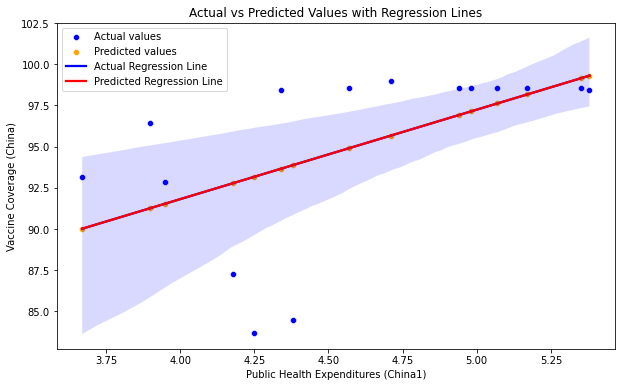

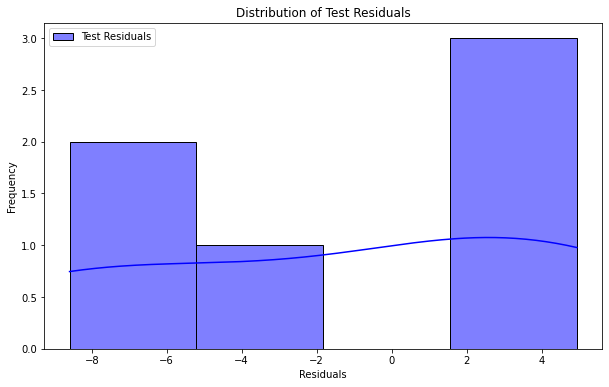

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import RegressionEvaluator

train_predictions = lr_model.transform(train_data)
test_predictions = lr_model.transform(test_data)

# Convert the predictions to a Pandas DataFrame
train_predictions_pd = train_predictions.select('features', 'China1', 'prediction').toPandas()

# Extract the feature values from the vector
train_predictions_pd['Public Health Expenditures (China1)'] = train_predictions_pd['features'].apply(lambda x: x[0])

# Rename columns
train_predictions_pd.rename(columns={'China1': 'Vaccine Coverage (China)', 'prediction': 'Predicted_Vaccine_Coverage'}, inplace=True)

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot the actual values
sns.scatterplot(x='Public Health Expenditures (China1)', y='Vaccine Coverage (China)', data=train_predictions_pd, color='blue', label='Actual values')

# Plot the predicted values
sns.scatterplot(x='Public Health Expenditures (China1)', y='Predicted_Vaccine_Coverage', data=train_predictions_pd, color='orange', label='Predicted values')

# Plot the regression line for actual values
sns.regplot(x='Public Health Expenditures (China1)', y='Vaccine Coverage (China)', data=train_predictions_pd, scatter=False, color='blue', label='Actual Regression Line')

# Plot the regression line for predicted values
sns.regplot(x='Public Health Expenditures (China1)', y='Predicted_Vaccine_Coverage', data=train_predictions_pd, scatter=False, color='red', label='Predicted Regression Line')

# Add labels and title
plt.xlabel('Public Health Expenditures (China1)')
plt.ylabel('Vaccine Coverage (China)')
plt.title('Actual vs Predicted Values with Regression Lines')
plt.legend()

# Show the plot
plt.show()

# Convert the test predictions to a Pandas DataFrame
test_predictions_pd = test_predictions.select('features', 'China1', 'prediction').toPandas()

# Extract the feature values from the vector
test_predictions_pd['Public Health Expenditures (China1)'] = test_predictions_pd['features'].apply(lambda x: x[0])

# Compute residuals for test data
test_predictions_pd['residuals'] = test_predictions_pd['China1'] - test_predictions_pd['prediction']

# Plot the distribution of residuals for test data
plt.figure(figsize=(10, 6))
sns.histplot(test_predictions_pd['residuals'], kde=True, color='blue', label='Test Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Test Residuals')
plt.legend()
plt.show()